# Analyze Results

Before running this  notebook, make sure you have previously generated all required experiments using the get_results notebook. For all completed experiments, you will see "runX_results.txt" files located in data/interim, with the train time, performance, training job name and performance.

Now, we should merge those files into a results dataframe (using a make command in Step 2 below to generate a results csv). Then, we can read in the data from the resulting files here as a dataframe to visualize the data and draw conclusions.

## Table of Contents:

1. [Install/Import Required Packages](#Install/Import-Required-Packages)
2. [Generate Experiment Results with the Makefile](#Generate-Experiment-Result-Table-with-the-Makefile)
3. [Visualize Results](#Visualize-Reults)
4. [Draw Conclusions](#Draw-Conclusions)

## 1. Install/Import Required Packages

Ensure you have run "make requirements" to set up your local environment, otherwise some packages may not be installed.

In [21]:
# if running in SageMaker Notebooks may need to install separately
# !pip install dash

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# import local package modules
sys.path.append("..")
from src.visualization import visualize as viz

## 2. Generate Experiment Result Table with the Makefile
Once all the experiments have been completed, and you have a results file for every run, you can execute this notebook.

Let's read in the raw results, and merge them with the experimental design plan, to create a dataframe with all of our data on HuggingFace Benchmarking.

<b>Using the makefile:</b>
* Open repository in terminal
* Navigate to the root director
* type the "make results" command and hit enter
* a file 'experiment_results.csv' containing all of your results will appear in the data/processed directory!

In [3]:
# read results from generated file and drop extra column
results = pd.read_csv('../data/processed/experiment_results.csv').drop(labels = "Unnamed: 0", axis = 1)

In [4]:
# view results
results

,run_id,dataset_name,automodel_name,num_parameters_tuned,s3_bucket,per_device_train_batch_size,learning_rate,epochs,instance_type,num_gpus,...,hourly_price,volume_size,parallel_enabled,num_nodes,dataset_size,job_name,train_time,billable_seconds,f1,job_cost
0,0,amazon_polarity,distilbert-base-uncased,66955010,hf-benchmarking-samstu,32,0.000050,5.0,ml.p3.16xlarge,32,...,28.152,30,True,4,600000,experiment-run0-05-03-21-44,3080,3080,0.946199,96.342400
1,1,amazon_polarity,distilbert-base-uncased,66955010,hf-benchmarking-samstu,32,0.000050,30.0,ml.p3.16xlarge,32,...,28.152,30,True,4,100000,experiment-run1-05-15-00-57,3106,3106,0.901768,97.155680
2,2,amazon_polarity,distilbert-base-uncased,66955010,hf-benchmarking-samstu,32,0.000050,3.0,ml.p3.16xlarge,32,...,28.152,30,True,4,1000000,experiment-run2-04-17-35-07,3179,3179,0.950130,99.439120
3,3,amazon_polarity,distilbert-base-uncased,66955010,hf-benchmarking-samstu,32,0.000050,3.0,ml.p3.16xlarge,16,...,28.152,30,True,2,1000000,experiment-run3-04-13-59-12,5379,5379,0.951479,84.127560
4,4,amazon_polarity,distilbert-base-uncased,66955010,hf-benchmarking-samstu,32,0.000050,30.0,ml.p3.2xlarge,1,...,3.825,1024,False,1,100000,experiment-run4-aug7-console,65379,65379,0.931478,69.465187
5,5,amazon_polarity,distilbert-base-uncased,66955010,hf-benchmarking-samstu,32,0.000050,5.0,ml.p3.16xlarge,32,...,28.152,30,True,4,600000,experiment-run5-04-20-29-21,3126,3126,0.946312,97.781280
6,6,amazon_polarity,distilbert-base-uncased,66955010,hf-benchmarking-samstu,32,0.000050,3.0,ml.p3.2xlarge,1,...,3.825,1024,False,1,1000000,experiment-run6-aug7-console,66355,66355,0.951820,70.502188
7,7,amazon_polarity,distilbert-base-uncased,66955010,hf-benchmarking-samstu,32,0.000050,30.0,ml.p3.2xlarge,1,...,3.825,1024,False,1,100000,experiment-run7-aug8-console,65485,65485,0.932963,69.577812
8,8,amazon_polarity,distilbert-base-uncased,66955010,hf-benchmarking-samstu,32,0.000050,3.0,ml.p3.16xlarge,32,...,28.152,30,True,4,1000000,experiment-run8-04-19-17-40,3220,3220,0.950730,100.721600
9,9,amazon_polarity,distilbert-base-uncased,66955010,hf-benchmarking-samstu,32,0.000050,5.0,ml.p3.2xlarge,1,...,3.825,1024,False,1,600000,experiment-run9-aug7-console,65896,65896,0.950548,70.014500


In [5]:
# add extra columns desired for for plotting
results['train_time_hrs'] = results['train_time'].apply(lambda x:x/3600)
results['log_train_time'] = results['train_time'].apply(lambda x:np.log(x))

# Visualize Results

Let's dig into the data and visualize the trends!

Useful Refs:
* https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
* http://physicalmodelingwithpython.blogspot.com/2015/08/function-arguments-args-and-kwargs.html
* https://stackoverflow.com/questions/17000620/add-axis-label-to-plot-in-matplotlib-by-passing-them-as-arguments-to-plot 
* https://www.python-graph-gallery.com/80-contour-plot-with-seaborn

## Changes in Training Job Execution Time with Increased Compute

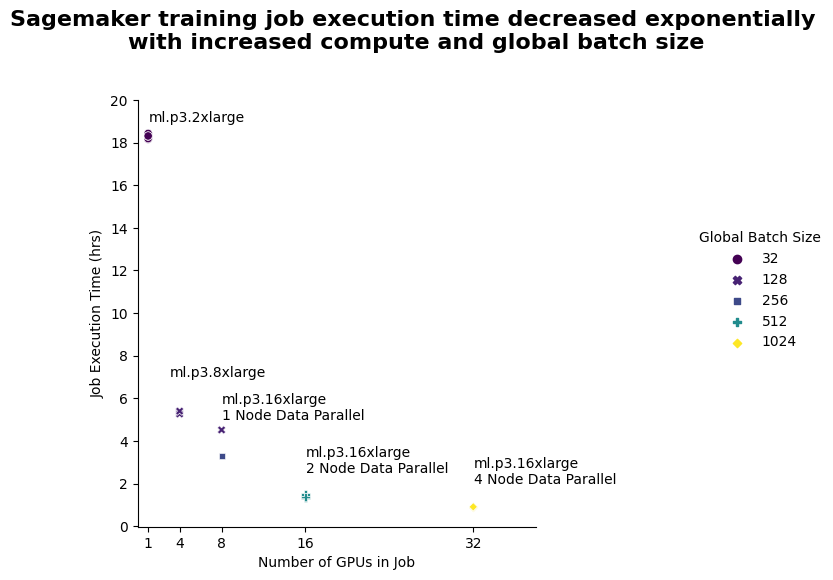

In [6]:
# train time decreases w/increasing GPUs
g1 = sns.relplot(data = results.iloc[:21], x = "num_gpus", y = "train_time_hrs", kind = "scatter", hue = 'global_batch_size', style = 'global_batch_size', legend = 'full', palette = 'viridis')
plt.xticks(results['num_gpus'].unique())
plt.yticks(range(0,21,2))
plt.xlim(0,38)
plt.title("Sagemaker training job execution time decreased exponentially \nwith increased compute and global batch size", fontdict = {'fontweight':'bold'},y=1.1, x = 0.7, fontsize = 16)
plt.xlabel("Number of GPUs in Job")
plt.ylabel("Job Execution Time (hrs)")

# customize legend
g1._legend.set_title("Global Batch Size")

# annotate the instance types 
ax = g1.axes[0,0]

# create position points for labels
instance_labels = ['ml.p3.2xlarge', 'ml.p3.8xlarge', 'ml.p3.16xlarge\n1 Node Data Parallel', 'ml.p3.16xlarge\n2 Node Data Parallel', 'ml.p3.16xlarge\n4 Node Data Parallel']
num_gpus = [1, 3, 8, 16, 32]
train_times = [19, 7, 5, 2.5, 2]

for ix, text in enumerate(instance_labels):
    x = num_gpus[ix]
    y = train_times[ix]
    ax.text(x+.05,y,text, horizontalalignment='left')

# save to file
plt.savefig('../reports/figures/train_time.png', bbox_inches = "tight")
plt.show()

Dataset size (number of samples) involved in training doesn't seem to impact the ultimate training job time. Visually, we can see this in the below plot.

In [7]:
gpu_1 = sns.barplot(x = results.dataset_size, y = results.loc[results['num_gpus']== 1, 'train_time_hrs'], color = "#440154FF", ci=None)
gpu_4 = sns.barplot(x = results.dataset_size, y = results.loc[results['num_gpus']== 4, 'train_time_hrs'], color = "#404788FF", ci=None)
gpu_8 = sns.barplot(x = results.dataset_size, y = results.loc[results['num_gpus']== 8, 'train_time_hrs'], color = "#238A8DFF", ci=None)
gpu_16 = sns.barplot(x = results.dataset_size, y = results.loc[results['num_gpus']== 16, 'train_time_hrs'], color = "#55C667FF", ci=None)
gpu_32 = sns.barplot(x = results.dataset_size, y = results.loc[results['num_gpus']== 32, 'train_time_hrs'], color = "#FDE725FF", ci=None)


plt.title("Training time does not vary with \nincreasing numbers of samples", fontdict = {'fontweight':'bold'},y=1.1, x = 0.5, fontsize = 16)
plt.xlabel("Number of Samples")
plt.ylabel("Job Training Time (hrs)")

# create position points for labels
instance_labels = ['1 GPU', '4 GPU', '8 GPU', '16GP U', '32 GPU']
pts_x = [1100000, 4, 8, 16, 32]
pts_y = [18, 5, 2.5, 1, 0.5]

for ix, text in enumerate(instance_labels):
    x = 1100000
    y = pts_y[ix]
    ax.text(x,y,text, horizontalalignment='center')

plt.savefig('../reports/figures/train_time_datasets.png', bbox_inches = "tight")

To model a statistical relationship here, we can take the log of the training time, and characterize a linear relationship based on the trend shown below. Future work to explore here.

In [8]:
# training time vs num GPUs
g = sns.catplot(x="num_gpus", y="log_train_time", hue="global_batch_size",
                data=results, kind="strip", col = 'dataset_size',
                height=4, aspect=.7);

## Changes in Model Performance with Increasing Compute

As this is a binary classification problem, model performance is measured by F1 score on the validation set. How does adding data parallelism affect the model performance?

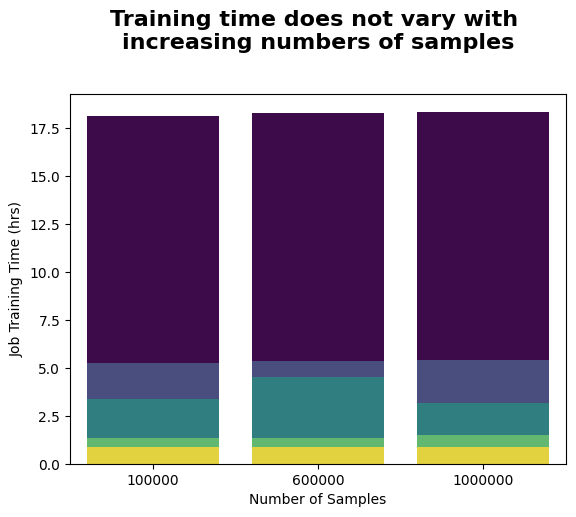

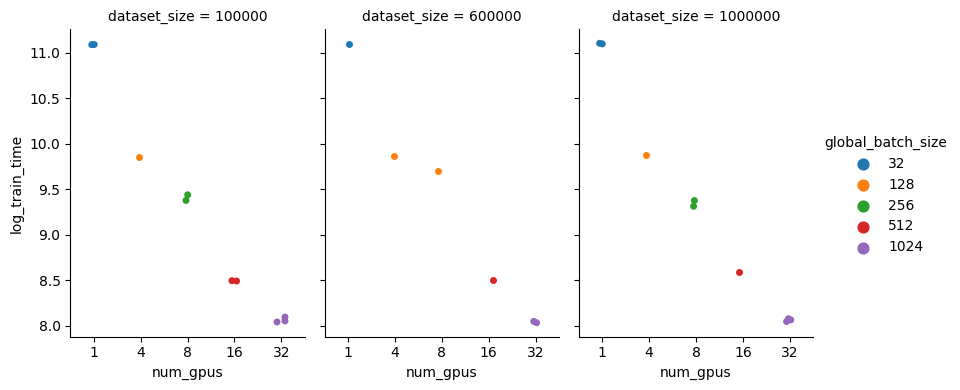

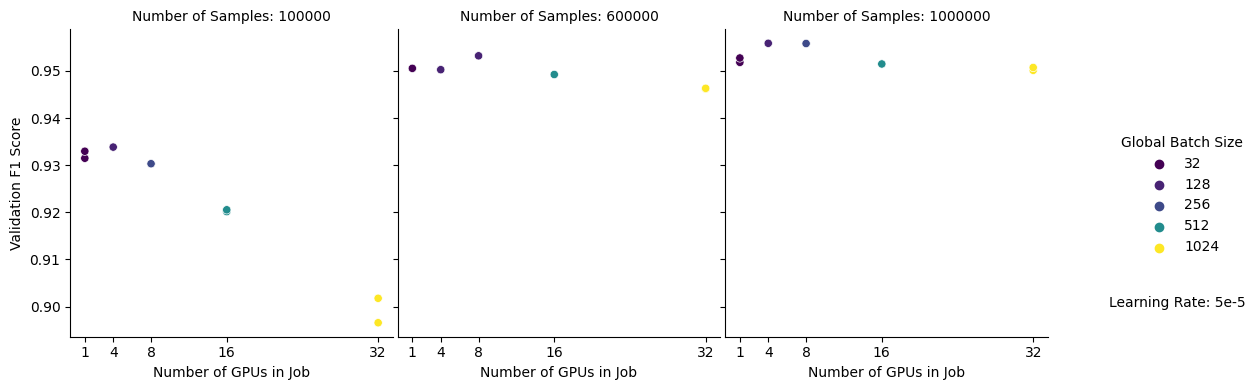

In [9]:
# validation F1 w/increasing GPUs
g2 = sns.relplot(data = results.iloc[:21], x = "num_gpus", y = "f1", kind = "scatter", hue = 'global_batch_size', legend = 'full', palette = 'viridis', col = 'dataset_size',height=4, aspect=.9,)
plt.xticks(results['num_gpus'].unique())

# customize plot
(g2.set_axis_labels("Number of GPUs in Job", "Validation F1 Score")
  .set_titles("Number of Samples: {col_name}")
  .tight_layout(w_pad=0))

# plt.title("Validation F1 Scores on the smallest sample runs trended down with scaling compute", fontdict = {'fontweight':'bold'},y=1.1, x = 0.2, fontsize = 16)
# customize legend
g2._legend.set_title("Global Batch Size")

# annotate the instance types 
ax = g2.axes[0,2]
# ax.text(.99, 1.8, "Validation F1 Scores on the smallest sample runs trended down with scaling compute")
ax.text(40,0.90,"Learning Rate: 5e-5", horizontalalignment='left')
plt.savefig('../reports/figures/performance.png', bbox_inches = "tight")
plt.show()

Interesting to notice the performance drops for the 100,000 sample dataset with increasing compute/global batch size.

### Mitigating performance drops by increasing learning rate

Experiment runs 21 and 22 were added to investigate whether increasing the learning rate in proportion with the global batch size would help. 
According to an empirical square root scaling rule that applies when the AdamW weight optimizer is used, doing this would increase performance. 
* Learn Rate for 1 GPU: 5e-5
* Learn Rate for 32 GPU: 
    * sqrt(32)*learn_rate_1GPU 
    * sqrt(32)*5e-5 = 2.83e-4 

Let's see what happened.

In [10]:
# visualize drops
compare_df = results.iloc[[11,21,2,22],:].copy()
# display(compare_df['global_batch_size'])
c1 = sns.catplot(data = compare_df, x = "dataset_size", y = "f1", hue = "learning_rate", kind = "bar")
plt.title("Increasing the learning rate empirically \nimproves F1 performance at global \nbatch size 1024 with 100,000 samples") 
plt.ylim(0.85,1)
ax = c1.axes[0,0]
ax.text(1.8,0.9,"Global batch size: 1024", horizontalalignment='left')
ax.text(1.8,0.895,"Optimizer: AdamW", horizontalalignment='left')
plt.savefig('../reports/figures/performance_remediation.png', bbox_inches = "tight")

Based on this - the empirical scaling rule DOES help to improve performance for the smaller dataset, but makes no real difference for the larger dataset.

Also, the improved learning rate only improves to the level of about 16GPU performance, rather than matching the performance on 1 GPU. This indicates a finer hyperparameter tuning job may be required to re-achieve peak performance at increased global batch size and increased compute.

## Changes in Job Cost with Increasing Compute

Now the big question - how is job cost affected by increasing compute?

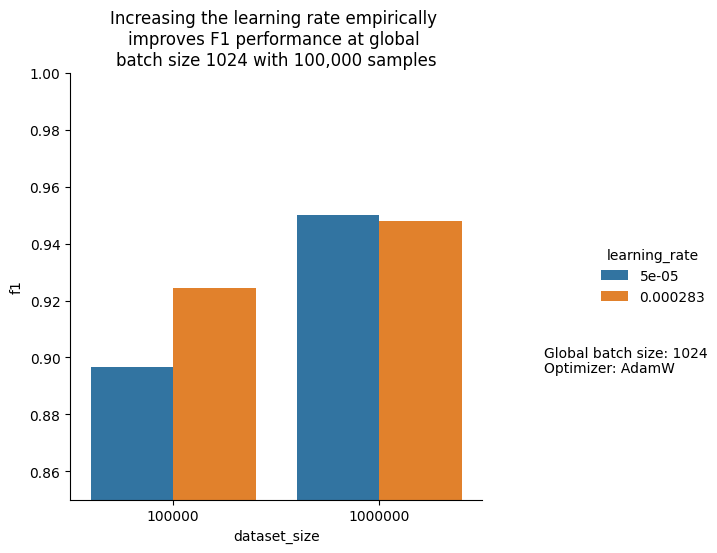

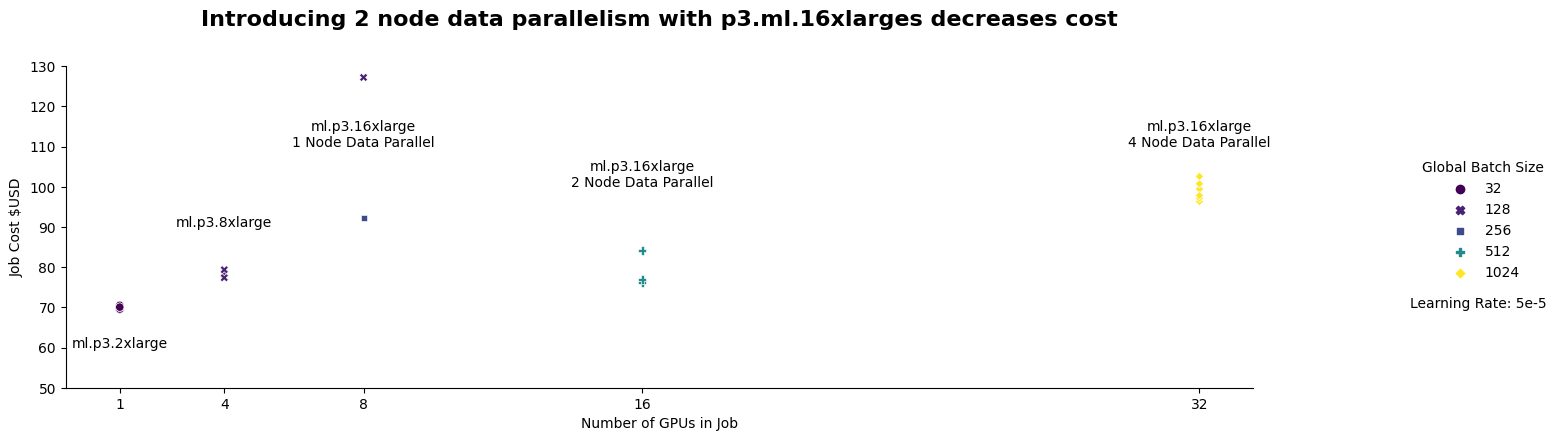

In [11]:
# Job Cost w/increasing GPUs
g3 = sns.relplot(data = results.iloc[:21], x = "num_gpus", y = "job_cost", kind = "scatter", hue = 'global_batch_size', style = 'global_batch_size', legend = 'full', palette = 'viridis', height=4, aspect=3.2,)
plt.xticks(results['num_gpus'].unique())

# plt.yticks(range(0,21,2))
# plt.xlim(0,38)
plt.ylim(50,130)
plt.title("Introducing 2 node data parallelism with p3.ml.16xlarges decreases cost", fontdict = {'fontweight':'bold'},y=1.1, x = 0.5, fontsize = 16)
plt.xlabel("Number of GPUs in Job")
plt.ylabel("Job Cost $USD")

# customize legend
g3._legend.set_title("Global Batch Size")

# annotate the instance types 
ax = g3.axes[0,0]

# create position points for labels
instance_labels = ['ml.p3.2xlarge', 'ml.p3.8xlarge', 'ml.p3.16xlarge\n1 Node Data Parallel', 'ml.p3.16xlarge\n2 Node Data Parallel', 'ml.p3.16xlarge\n4 Node Data Parallel']
num_gpus = [1, 4, 8, 16, 32]
train_cost = [60, 90, 110, 100, 110]

for ix, text in enumerate(instance_labels):
    x = num_gpus[ix]
    y = train_cost[ix]
    ax.text(x,y,text, horizontalalignment='center')


# customize legend
g3._legend.set_title("Global Batch Size")

# annotate the instance types 
ax.text(40,70,"Learning Rate: 5e-5", horizontalalignment='center')
plt.savefig('../reports/figures/cost.png', bbox_inches = "tight")
plt.show()

In [12]:
# calculate savings between 8 and 16
exp_results = results.iloc[:21].copy()

# use median to overcome the outlier from run 16 (modified per device batch size to work around CUDA error)
median_8 = exp_results.loc[exp_results['num_gpus'] == 8, 'job_cost'].median()
median_16 = exp_results.loc[exp_results['num_gpus'] == 16, 'job_cost'].median()

print("Savings from 2 node data parallelism:")
print((median_16 - median_8)/median_8*100)



Savings from 2 node data parallelism:
-16.93623507494284


In [13]:

median_8 = exp_results.loc[exp_results['num_gpus'] == 8, 'job_cost'].median()
median_16 = exp_results.loc[exp_results['num_gpus'] == 16, 'job_cost'].median()


Interestingly, the improvement in training time is so significant between 8GPUs and 16 GPUs, a customer could actually DECREASE their costs by implementing 2-node data parallelism. Pretty cool right?

With 4 nodes, however, the improvements in training time come with a greater cost, and the price is about equivalent to using 8 nodes. However, you will have a significantly better value for your money in time saved using 4 nodes than 1 node!

## A single p3.ml.16xlarge instance has 8GPUs: how long is the training time for one node with parallelism vs no parallelism?

On an ml.p3.16xlarge instance, you can introduce data parallelism on one node alone. 

Does it save any time or money to do it this way? Run 23 and 24 were executed to find out.

In [14]:
parallel_17 = results.iloc[17]['train_time']
parallel_18 = results.iloc[18]['train_time']
nopar_17 = results.iloc[23]['train_time']
nopar_18 = results.iloc[24]['train_time']

print("% Change in training time by introducing parallelism on ONE p3.ml.16xl instance (8GPUs):")
print("100,000 obs:")
print(f"Before: {nopar_17} | After: {parallel_17} (seconds) | % Change in Train Time with Parallelism: {(parallel_17-nopar_17)/nopar_17*100} %")
print("1 Million obs:")
print(f"Before: {nopar_18} | After: {parallel_18} (seconds) | % Change in Train Time with Parallelism: {(parallel_18-nopar_18)/nopar_18*100} %")

% Change in training time by introducing parallelism on ONE p3.ml.16xl instance (8GPUs):
100,000 obs:
Before: 12560 | After: 11809 (seconds) | % Change in Train Time with Parallelism: -5.979299363057325 %
1 Million obs:
Before: 11076 | After: 11789 (seconds) | % Change in Train Time with Parallelism: 6.437342000722282 %


## Calculating Incremental Improvements 
How much time is saved by scaling, for how much money? Values used in final report.

In [15]:
results_gpus = results.iloc[:21].groupby(['num_gpus']).mean()

# find mean time and cost saved with varying GPUs
mean_time = results_gpus['train_time_hrs'].values
time_saved = mean_time[1:] - mean_time[0:-1]

mean_cost = results_gpus['job_cost'].values
cost_saved = mean_cost[1:] - mean_cost[0:-1]

print("The hours saved with each scaling event:", time_saved)
print("The cost change with each scaling event:", cost_saved)

The hours saved with each scaling event: [-12.94485185  -1.64444444  -2.29793981  -0.51381944]
The cost change with each scaling event: [  8.44407     25.54102667 -25.47625667  20.57051   ]


In [16]:
# mean train time, in units of hours
display(results_gpus['train_time_hrs'])
# std dev train time, in units of in minutes
display(results.iloc[:21].groupby(['num_gpus']).std()['train_time_hrs']*60)

num_gpus
1     18.280222
4      5.335370
8      3.690926
16     1.392986
32     0.879167
Name: train_time_hrs, dtype: float64

num_gpus
1      6.508332
4      4.051143
8     42.964806
16     4.060569
32     1.257069
Name: train_time_hrs, dtype: float64

Interesting! Based on this, it seems that training time decreased 6% running parallelism on the smallest dataset, but actually increased on the largest dataset. It seems like multi-node parallelism gives better value based on this result.

Use of other more powerful instances may be better than running parallelism on ONE node of 16xlarge.

## Interactive 3D Surface Plots

Here we can visualize the relationships between all our factors of interest and training job cost, time, and performance. 

Take these 3D plots with a grain of salt - the cubic interpolation has added some strange values.

Generally, these are interesting to help build intuition about the observed trends, and are interactive to explore.

In [17]:
# subset results from controlled experiment for surface plot
results_surf = results.iloc[0:21].copy()

In [18]:
# train time surface plot
x = results_surf['num_gpus']
y = results_surf['dataset_size']
z = results_surf['train_time']/3600
plot_options = {"fig_title":'Distributed Training Job Time',
                "x_title":'Number of GPUs',
                "y_title" :'Dataset Size',
                "z_title" :'Training Time (hrs)'}

viz.make_surface(x, y, z, **plot_options)

In [19]:
# f1 surface plot
x = results_surf['num_gpus']
y = results_surf['dataset_size']
z = results_surf['f1']
plot_options = {"fig_title":'Distributed Training Job Performance',
                "x_title":'Number of GPUs',
                "y_title" :'Dataset Size',
                "z_title" :'Validation F1 Scores'}

viz.make_surface(x, y, z, **plot_options)

In [20]:
# job cost surface plot
x = results_surf['num_gpus']
y = results_surf['dataset_size']
z = results_surf['job_cost']
plot_options = {"fig_title":'Distributed Training Job Cost',
                "x_title":'Number of GPUs',
                "y_title" :'Dataset Size',
                "z_title" :'$USD'}

viz.make_surface(x, y, z, **plot_options)